$f_i^L=P_i^s\phi_i^s\mathrm{exp}[v_i^L(P-P_i^s)/RT]$

$\mathrm{ln}\hat{\Phi_i}=\frac{b_i}{v_t-b}-\mathrm{ln}[Z_m(1-\frac{b}{v_t})]-\frac{2\sqrt{aa_i}}{RTv_t}$

$\mathrm{ln}\hat{\phi_i}=\frac{1}{RT}\int_{0}^{P}[(\frac{\partial V_t}{\partial n_i})_{T,P,n_j}-(\frac{RT}{P})]\mathrm{d}P$

$\mathrm{ln}\frac{f_i^L}{P}=\frac{1}{RT}\left [ \int_{0}^{P_i^s}\left ( v_i-\frac{RT}{P} \right )\mathrm{d}P+\int_{P_i^s}^{P}\left ( v_i-\frac{RT}{P} \right )\mathrm{d}P \right ]$

$\mathrm{ln}\gamma_{1}=\mathrm{ln}\frac{\Psi_{1}}{x_{1}}+\frac{\bar{Z}}{2}q_{1}\mathrm{ln}\frac{\theta_{1}}{\Psi_{1}}+\Psi_{2}\left ( l_1-\frac{r_1}{r_2}l_2 \right )-q_1\mathrm{ln}(\theta_1+\theta_2T_{21})+\theta_2q_1\left ( \frac{T_{21}}{\theta_1+\theta_2T_{21}}-\frac{T_{12}}{\theta_2+\theta_1T_{12}} \right )$

In [3]:
a0=1
a1=1
listFi=[a0,a1]
for i in range(0,10-2):
    listFi.append(listFi[i]+listFi[i+1])

print(listFi)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [4]:
def f(n):
    if n==0:
        return 1
    if n==1:
        return 1
    else:
        return f(n-1)+f(n-2)

listFi=[f(0),f(1)]
for n in range(2,10):
    listFi.extend([f(n)])

print(listFi)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [5]:
import numpy as np

def g(x):
    return 1/3*(x**3)-np.exp(-x)+10*np.log(x)

ana=g(10)-g(1)
print(ana)

356.393684971


In [6]:
import numpy as np

def f(x):
    return x**2+np.exp(-x)+10/x

n=5
h=(10-1)/(n-1)
s=0.0
s+=f(1)/2
for i in range(1,n-1):
    s+=f(1+i*h)
s+=f(10)/2
trape=h*s

print(trape)

367.397283641


98
[3.7076853734545412, 2.9445231408219534, 2.3982223710748585, 1.9709819009750256, 1.6194869613956864, 1.3206240980583124, 1.0605497154442434, 0.83029066869466417, 0.62368633507609039, 0.43631779840736806, 0.26490439266195004, 0.10694182781387086, -0.039525891785004458, -0.17605620844976264, -0.3039097240428828, -0.424121310739492, -0.53755107238782429, -0.64492165832772685, -0.7468461031069118, -0.84384894551109368, -0.93638248793391365, -1.0248394812558672, -1.1095631399150301, -1.1908551351048549, -1.268982037446877, -1.3441805569147398, -1.4166618399563033, -1.4866150204301525, -1.5542101747012922, -1.6196007970161803, -1.682925885703219, -1.7443117113772031, -1.8038733236183464, -1.8617158411963231, -1.9179355621073964, -1.9726209228146547, -2.0258533306026947, -2.0777078886638356, -2.1282540301078852, -2.177556074250258, -2.2256737163546005, -2.2726624601513659, -2.3185740009808526, -2.3634565661376303, -2.4073552180696818, -2.4503121251607696, -2.4923668041760632, -2.5335563378

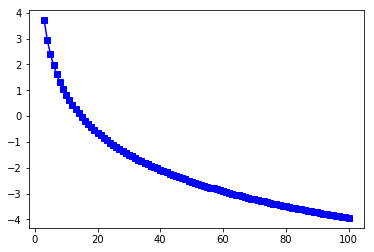

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def tr(f,a,b,n):
    h=(b-a)/(n-1)
    s=0.0
    s+=f(a)/2
    for i in range(1,n-1):
        s+=f(a+i*h)
    s+=f(b)/2
    return np.log(h*s-ana)

listtr=[tr(f,1,10,3)]
for n in range(4,101):
    listtr.extend([tr(f,1,10,n)])

print(len(listtr))
print(listtr)

n=np.arange(3,101,1)
print(len(n))
plt.plot(n,listtr,'-bs')
plt.show()

In [8]:
from scipy import integrate
integrate.quad(f,1,10,full_output=1)

(356.3936849711822,
 8.877356177637856e-08,
 {'alist': array([ 1.        ,  5.5       ,  2.2151216 ,  2.13457173,  2.05967447,
          1.989855  ,  1.92461385,  1.863515  ,  1.80617608,  1.75226037,
          1.70147022,  1.65354148,  1.60823897,  1.5653526 ,  1.52469409,
          1.48609424,  1.44940056,  1.41447524,  1.38119347,  1.3494419 ,
          1.31911736,  1.29012577,  1.26238113,  1.23580468,  1.21032418,
          1.18587318,  1.16239055,  1.13981985,  1.118109  ,  1.09720977,
          1.07707748,  1.05767068,  1.03895084,  1.02088213,  1.00343115,
          0.98656677,  0.97025988,  0.95448329,  0.93921156,  0.92442083,
          0.91008872,  0.89619424,  0.88271763,  0.86964033,  0.85694485,
          0.84461471,  0.83263436,  0.82098913,  0.80966514,  0.79864929]),
  'blist': array([  5.50000000e+000,   1.00000000e+001,   0.00000000e+000,
           0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
           0.00000000e+000,   0.00000000e+000,   0.00000000e+000

100
100
-1991.9910492


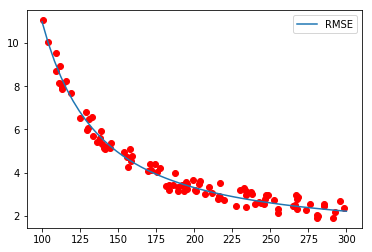

-1993.50916392


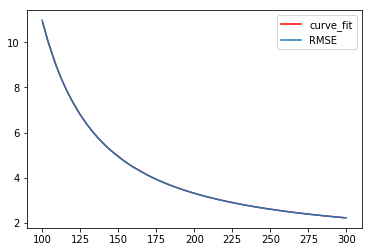

In [2]:
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

orig_data=[(203.96935366605618, 3.6236800011478305), (245.69114764482345, 2.5689954976962932), (239.63438120412232, 2.5713366188827265), (189.36591228846885, 3.1540244055624758), (111.43204914150688, 8.1696752407461783), (207.32680522705272, 3.026045517845918), (264.8393324954053, 2.4416420424392249), (144.85766191924512, 5.1482403318133469), (124.84448741258993, 6.5462805948653529), (109.11582701887153, 9.5459326923835963), (109.14575513306579, 8.701586669774322), (153.76859067461749, 4.9682826810133864), (246.59886090908026, 2.7941491059160417), (145.08430033257423, 5.3798783290838301), (181.48630172255744, 3.3786473079440942), (296.00840136351894, 2.7076518974888186), (143.51791746953251, 5.2283390658181625), (291.33779532362166, 1.9130435659045719), (130.65687336694253, 6.479997876184644), (267.9807806900896, 2.8677012219049618), (232.66081388011543, 3.2860854111655939), (298.65839492102384, 2.366780626113413), (280.43866195918883, 2.0389654773857879), (273.45156179153878, 2.2732288646263061), (266.23615785290224, 2.5199497092331762), (139.69880734182109, 5.3218862610124091), (248.32274960154558, 2.9751709238837432), (119.33547334977861, 7.6779774629955426), (115.84875500204355, 8.2377243679585082), (112.12311197712026, 8.9201008361384204), (266.93119983401641, 2.9565481485864806), (187.05077060298555, 4.0088838201523149), (103.85112749577554, 10.032991787687269), (198.90333963103947, 3.6822393220531722), (195.49304748667089, 3.2713352779807159), (292.63056978401187, 2.2042519892918793), (217.02147505796466, 2.8111877951917199), (201.33078125784647, 3.1775229263026636), (216.37990435154126, 2.9256344629180924), (281.50670292987559, 1.9933463522298778), (211.56148022544059, 3.0773921955233199), (133.11995792016782, 6.5682826888103056), (191.68563190316667, 3.4379386715422964), (285.17511666000246, 2.4537442491121171), (254.94338341999406, 2.1552075747097761), (227.63603305109274, 2.4546627992454644), (230.17654229002088, 3.2077960310435225), (177.76631733590341, 4.2148539864942531), (174.49707572077983, 4.403014573195728), (100.5210960776798, 11.046854338400221), (141.1260218959988, 5.1055128973332531), (200.28225702824335, 3.1968177710127277), (267.68867211105407, 2.8018708963966579), (128.8809959552226, 6.796888943234479), (209.65910535851197, 3.3430911403901469), (285.14483063498903, 2.5726698754266852), (171.92317896938238, 4.1256045510260195), (158.07639389549189, 5.0795224010122979), (113.19666217333469, 7.9426707556544232), (193.48966030242107, 3.1722804406157343), (255.07329354144537, 2.3344124005137377), (195.28068107295562, 3.4573465897461508), (183.09725218584222, 3.2249328487824225), (135.95121929524774, 5.4153477686167175), (267.47601424004125, 2.3212487554600036), (215.8969424087125, 2.7946129548309626), (113.93297318297932, 8.1609464202344668), (203.31353375613435, 3.4971561246431224), (158.68449233558033, 4.538225058225497), (183.45844792035984, 3.4459350872523986), (156.16290402828591, 4.2852214699536253), (280.6398476314381, 1.9176106807059239), (140.94426342931845, 5.1533855583412427), (175.62052653070822, 4.0434904236526572), (186.07999195301434, 3.4414274801117868), (234.13238756182704, 3.1589330490903196), (237.9183918239728, 3.021185463566284), (113.3629902933059, 7.8521790858837237), (138.16666669007344, 5.6283905540747856), (129.83386512795178, 5.9957233266021204), (217.21859499857163, 2.8353008897700707), (252.70524179629422, 2.7277927526130439), (216.75453259096082, 3.5249659388859351), (159.14482568642438, 4.772017375345083), (219.51226392175252, 2.7242634665703145), (244.03849796909088, 2.6010537089914068), (170.73657567094938, 4.4017327441768153), (139.04336390741207, 5.9218621403594858), (233.99576678643649, 2.4296255018678501), (155.7527106158966, 4.7151482622656502), (133.19681725820718, 5.6937119116585535), (242.76647988792055, 2.6353213576862471), (189.1788922720159, 3.3385707870618901), (247.03945453501777, 2.972159429935691), (234.02696189516342, 2.9823121771307903), (129.90075057086969, 6.0769569333148192), (276.36743553532108, 2.5350931205675171), (237.48595334396069, 3.1120208936124176), (169.31498940778619, 4.1020927705134218), (194.84992167847139, 3.5816350401484569)]
data=sorted(orig_data, key=lambda t:t[0])

T,K=zip(*data)
dataT=list(T)
dataK=list(K)
print(len(dataT))
print(len(dataK))

R=8.314
def s(deltaG):
    s=0
    i=1
    while i<=99:
        s=s+(dataK[i]-np.exp(-deltaG/R/dataT[i]))**2
        i=i+1
    return s

res=minimize_scalar(s,method='brent')
print(res.x)

plt.plot(dataT,dataK,'ro')
Temp=np.linspace(100,300)
plt.plot(Temp,np.exp(-res.x/R/Temp),label='RMSE')
plt.legend(loc=1)
plt.show()

def Ra(T,deltaG):
    return np.exp(-deltaG/R/T)
popt,pcov=curve_fit(Ra,dataT,dataK)
deltaG=popt[0]
print(deltaG)
plt.plot(dataT,Ra(dataT,*popt),'r-',label='curve_fit')
plt.plot(Temp,np.exp(-res.x/R/Temp),label='RMSE')
plt.legend(loc=1)
plt.show()